In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans


#import module for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Question-2

In [12]:
# import the data
data = pd.read_csv('data.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,ArticleId,Text
0,1833,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster better ...
4,917,enron bosses 168m payout eighteen former enron...
...,...,...
1485,857,double eviction big brother model caprice holb...
1486,325,dj double act revamp chart show dj duo jk joel...
1487,1590,weak dollar hits reuters revenues media group ...
1488,1587,apple ipod family expands market apple expande...


In [16]:
#retrive texts
texts = data['Text']
texts

0       worldcom exboss launches defence lawyers defen...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens maj...
3       lifestyle governs mobile choice faster better ...
4       enron bosses 168m payout eighteen former enron...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hits reuters revenues media group ...
1488    apple ipod family expands market apple expande...
1489    santy worm makes unwelcome visit thousands web...
Name: Text, Length: 1490, dtype: object

In [20]:
# define a function for pre-processing the text
# this function can be used with TfidfVectorizer
def preprocess(text):
    punctuations = string.punctuation
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()                                 #initializing the lemetizer
    
    #function for removing punctuations
    def remove_punctuation_from_word(word):
        return ''.join(c for c in word if c not in punctuations)


    words = word_tokenize(text)                                       #text to tokens
    words = [word for word in words if not word in stop_words]        # removing stop words
    words = [word for word in words if not len(word.strip())<2]       # removing the words having length < 2
    words = [word.lower() for word in words]                          #convert all words to lowercase
    words = [word for word in words if word.isalnum()]                #remove non alphanumeric
    words = [remove_punctuation_from_word(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]             #lemmetize
    words = [lemmatizer.lemmatize(word, pos='a') for word in words]    #lemetize adjectives
    return ' '.join(words)     

In [23]:
# convert all documents to vectors based on tfidfs of each terms
vectorizer = TfidfVectorizer(lowercase= True, stop_words='english', preprocessor=preprocess)  #initialize tf-idf vectorizer
X = vectorizer.fit_transform(texts)
features = vectorizer.get_feature_names()                                       #list of features
feature_vectors = X.toarray()                                                   #feature vectors for doing the classification

In [27]:
len(features)          # no. of features

23986

###### K-Means Algorithm for clustering

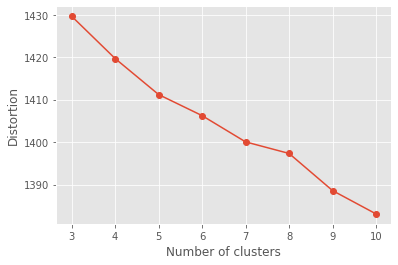

In [59]:
# finding optimum number of clusters
# calculate distortion for a range of number of cluster from 1 to 10
distortions = []
for i in range(3, 11):
    km = KMeans(n_clusters=i, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
    km.fit(feature_vectors)
    distortions.append(km.inertia_)
    
# plot the distortion vs number of clusters
plt.plot(range(3, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [33]:
# do k-mean clustering for best number of clusters
# for 5 clusters
km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300,tol=1e-04, random_state=0)
km.fit(feature_vectors)
y = km.predict(feature_vectors)
centroids = km.cluster_centers_                    #get cluster centers
centroids[0]

array([ 3.33248371e-04,  1.28373330e-02, -1.35525272e-20, ...,
        5.42101086e-20, -2.71050543e-20, -8.13151629e-20])

In [37]:
# Add new column to the dataframe with cluster number
data['y'] = y
data

,ArticleId,Text,y
0,1833,worldcom exboss launches defence lawyers defen...,1
1,154,german business confidence slides german busin...,1
2,1101,bbc poll indicates economic gloom citizens maj...,1
3,1976,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses 168m payout eighteen former enron...,1
...,...,...,...
1485,857,double eviction big brother model caprice holb...,3
1486,325,dj double act revamp chart show dj duo jk joel...,3
1487,1590,weak dollar hits reuters revenues media group ...,1
1488,1587,apple ipod family expands market apple expande...,4


In [38]:
data[data.loc[:,'y']==1]['ArticleId']

0       1833
1        154
2       1101
4        917
8       2034
        ... 
1478    1144
1479    2058
1480    1124
1484    1774
1487    1590
Name: ArticleId, Length: 430, dtype: int64

In [46]:
for i in range(len(centroids)):
    print('Cluster-{}\n----------------------------'.format(i+1))
    articles_i = list(data[data.loc[:,'y']==i]['ArticleId'])
    print('No. of articles:{}'.format(len(articles_i)))
    print('Article IDs:')
    print(articles_i)
                      
    # get cluster centers tfidf
    centroid = centroids[i]
    feature_tfidf = {}                   # dictionary for saving words corresponding to each tfidf
    for i in range(len(features)):
        feature_tfidf[features[i]] = centroid[i]
    
    # sort tfidf for getting important words
    sorted_tfidf = sorted( feature_tfidf.items(), key=lambda kv: kv[1], reverse=True)
    best_15_words = sorted_tfidf[:15] 
    
    
    # print best 15 words for each cluster
    print('\nRelevant Words:')
    for doc in best_15_words:
        print(doc[0]) 
                      
    

Cluster-1
----------------------------
No. of articles:172
Article IDs:
[1683, 1518, 947, 105, 1297, 2127, 639, 1544, 813, 39, 1825, 749, 1469, 1260, 344, 378, 413, 1205, 828, 1696, 261, 761, 171, 1175, 1446, 122, 302, 1517, 2153, 1360, 1121, 575, 1554, 1466, 1451, 1851, 1893, 1349, 400, 1391, 440, 1348, 1482, 1031, 1717, 1939, 1688, 1713, 572, 1170, 2156, 1318, 1528, 623, 470, 2204, 1239, 870, 549, 1526, 324, 289, 1498, 1570, 1041, 832, 2119, 1783, 1589, 310, 882, 1546, 1817, 1938, 2050, 1398, 1008, 2083, 701, 543, 898, 1013, 1209, 390, 520, 1877, 207, 792, 1104, 415, 487, 833, 1903, 1347, 86, 1613, 1155, 1792, 1034, 2047, 1708, 1504, 253, 641, 1149, 613, 661, 622, 740, 1850, 2045, 153, 1368, 1289, 257, 1690, 1988, 2109, 637, 517, 1838, 2081, 825, 2063, 818, 2170, 979, 1108, 1852, 29, 1112, 193, 1301, 1661, 93, 566, 2019, 920, 1818, 284, 14, 1156, 1441, 386, 1250, 863, 1595, 494, 198, 1605, 288, 1571, 1791, 2060, 1651, 2198, 104, 165, 473, 169, 208, 2084, 929, 232, 1355, 7, 1178, 718,

### Question -1

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from numpy import linalg
import queue

plt.style.use('ggplot')
%matplotlib inline

###### Part -a

In [205]:
# create a custom class for dbscan

class dbScan:
    
    #init function
    def __init__(self,Eps,MinPt):
        self.Eps = Eps
        self.MinPt = MinPt
        
    # function for standardising the datapoints
    def data_standardise(self,X):
        sc = StandardScaler()
        return sc.fit_transform(X)
    
    # function for getting neigbouring point of a given all datapoints
    def epsilon_neighbour(self, data):
        
        points = []
        for i in range(len(data)):
            temp = []
            for j in range(len(data)):
                if linalg.norm(data[i,:]-data[j,:]) <= self.Eps:
                    temp.append(j)
            points.append(temp)
        
        return points
    


        

###### Import give dataset

In [199]:
#read the dataset
data = pd.read_csv('dbscan.csv')
data.columns = ['x1','x2']
data

,x1,x2
0,100.369485,91.723728
1,118.670830,49.404950
2,106.303971,54.869194
3,99.937150,91.353868
4,86.602028,84.495519
...,...,...
535,125.904297,-33.664439
536,54.016283,-10.302560
537,-43.867790,96.264202
538,-5.117278,45.919416


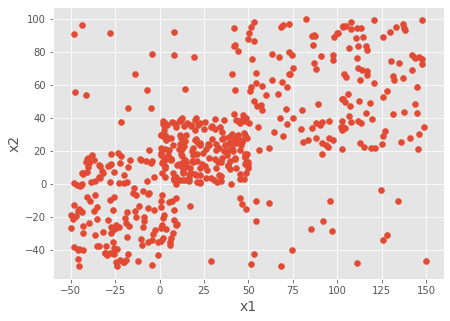

In [163]:
# Visualising the data
plt.figure(figsize=(7,5))
plt.scatter(data.loc[:,'x1'], data.loc[:,'x2'])
plt.xlabel('x1', size=14)
plt.ylabel('x2', size=14)
plt.show()

In [ ]:
# run dbscan on give dataset

###### Part - b

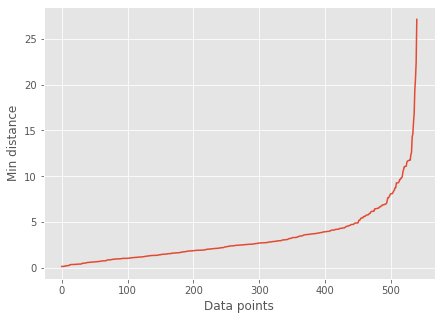

In [127]:
#finding eps and min_samples value
#its a two dimentional data so select min_samples = 4


#calculate distance of each point to its 4 nerest neightbours using knn
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

#sort the distance in ascending order and get min distance of each point
distance = np.sort(distances, axis=0)
distance = distance[:,1]

#plot the distances
plt.figure(figsize=(7,5))
plt.plot(distance)
plt.xlabel('Data points')
plt.ylabel('Min distance')
plt.show()

In [ ]:
# from this we can say that epsilon value taking a diversion from 5 to 12
# iterate over epsilon from 5 to 12 
# remove data points corresponding good cluster for next iteration

In [203]:
epsilon = [5,6,7,8,9,10,11,12]                              # list of epsilon get from elbow method
min_count = 20                                              #set a minimum count per cluster get an idea from visualization
clusters_no = ['c1', 'c2','c3','c4','c5','c6','c7']
i = 0
data_new = data

for eps in epsilon:
    dbscan = DBSCAN(eps=eps, min_samples=4) #initilize dbscan model
    dbscan.fit(data_new)                        #fit the model
    labels = dbscan.labels_                 #labels of each data point
    
    unique_labels = set(labels)
    
    
    for l in unique_labels:
        if l != -1:
            if len(data_new[data_new['labels']==l]) < min_count:
                data_new[data_new['labels']==l]['labels'] = -1
            else:
                data_new[data_new['labels']==l]['labels'] = cluster_no[i]
                i = i+1
    
    data = data.append(data_new[data_new['labels']==cluster_no[i-1]])
    data_new = data_new[data_new['labels'] != 1]             #next set of pionts
                    

KeyError: 'labels'

In [ ]:
# clustering with some arbitary values

In [196]:
dbscan = DBSCAN(eps=12, min_samples=12) #initilize dbscan model
dbscan.fit(data_new)                        #fit the model
labels = dbscan.labels_                 #labels of each data point
data['labels']  = labels 
set(labels)

{-1, 0, 1, 2, 3, 4}

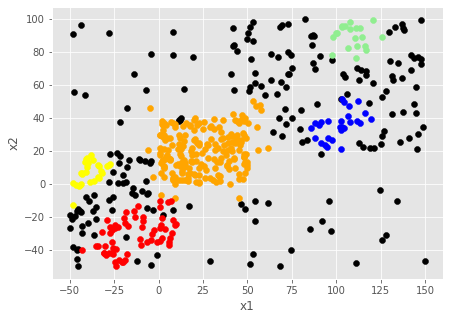

In [197]:
#plot the clusters
plt.figure(figsize=(7,5))
plt.scatter(data[data['labels']==-1].x1, data[data['labels']==-1].x2, color= 'black')
plt.scatter(data[data['labels']==0].x1, data[data['labels']==0].x2, color= 'blue')
plt.scatter(data[data['labels']==1].x1, data[data['labels']==1].x2, color= 'orange')
plt.scatter(data[data['labels']==2].x1, data[data['labels']==2].x2, color= 'lightgreen')
plt.scatter(data[data['labels']==3].x1, data[data['labels']==3].x2, color= 'red')
plt.scatter(data[data['labels']==4].x1, data[data['labels']==4].x2, color= 'yellow')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
# iterate over epsilon and min points
epsilon = [9,10,11,12,13,14]   
min_poins = [9,10,11,12,13,14]